## Observations and Insights 

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combined_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [82]:
# Checking the number of mice
# THERE ARE 249 UNIQUE MICE IN THIS STUDY
unique_MouseID = len(combined_df["Mouse ID"].unique())
unique_MouseID

249

In [83]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# duplicateRowsDF = dfObj[dfObj.duplicated()]
# these 5 rows have the same Mouse ID and Timepoint. But the tumor volumes and metastatic sites are different... 
duplicate_mouse = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [84]:
# Optional: Get all the data for the duplicate mouse ID. 


In [85]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#df.drop(index=df[df['road'] == '(R)'].index, inplace=True)
clean_df = combined_df.drop(index=combined_df[combined_df['Mouse ID'] == "g989"].index)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [86]:
# Checking the number of mice in the clean DataFrame.
# THE CLEAN DATA HAS ONLY 248 MICE BECAUSE I GOT RID OF MOUSE G989 (13 LINES OF DATA)
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [87]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the
# tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.




In [88]:
# create grouped-by dataframe to base all the following stats off of
tumor_volume_df = clean_df[['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen']]
tumor_vol_by_drug_df = tumor_volume_df.groupby('Drug Regimen')


In [89]:
# find mean of tumor volume for each regimen
mean = tumor_vol_by_drug_df["Tumor Volume (mm3)"].mean()
#mean

# find median of tumor volume for each regimen
median = tumor_vol_by_drug_df["Tumor Volume (mm3)"].median()
#median

# find variance of tumor volume for each regimen
variance = tumor_vol_by_drug_df["Tumor Volume (mm3)"].var()
#variance

# find standard deviation of tumor volume for each regimen
std_dev = tumor_vol_by_drug_df["Tumor Volume (mm3)"].std()
#std_dev

# find SEM of tumor volume for each regimen
sem = tumor_vol_by_drug_df["Tumor Volume (mm3)"].sem()
#sem

# put these values into a dataframe
summary_stats_df = pd.DataFrame({"Mean" : mean,
                                "Median" : median, 
                                "Variance" : variance, 
                                "Standard Deviation" : std_dev,
                                "SEM" : sem})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
# tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# BILL SAYS - DO THE SAME THING AS ABOVE JUST USE THE 'AGG' FUNCTION (STILL DO A GROUPBY)
summary_stats_df2 = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_df2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [91]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


In [92]:
drug_groupby_df = clean_df.groupby(['Drug Regimen'], as_index=False)
drug_count_df = drug_groupby_df.count()
drug_df = drug_count_df[['Drug Regimen', 'Timepoint']]
drug_df.head(30)


,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


<AxesSubplot:xlabel='Drug Regimen'>

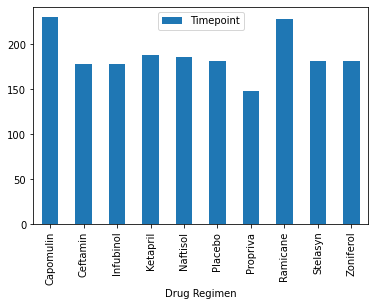

In [93]:
# df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
# ax = df.plot.bar(x='lab', y='val', rot=0)

drug_df.plot.bar(x='Drug Regimen', y='Timepoint', rot=90)


In [94]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [95]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = clean_df.groupby('Sex', as_index=False)
gender_df.count()

,Sex,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


([<matplotlib.patches.Wedge at 0x7fe03baf3430>,
 [Text(-0.79864235783093, -0.8956396509078041, 'Female'),
  Text(0.7320888280116863, 0.8210030133321532, 'Male')],
 [Text(-0.46587470873470915, -0.5224564630295523, '49.0%'),
  Text(0.3993211789154652, 0.4478198254539017, '51.0%')])

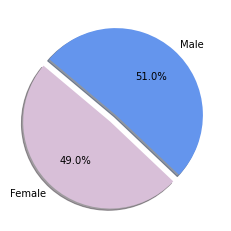

In [96]:
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [922, 958]

# The colors of each section of the pie chart
colors = ["thistle", "cornflowerblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

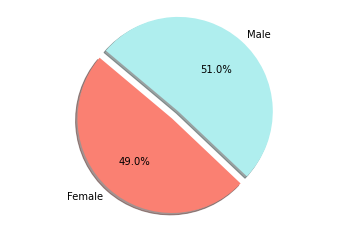

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pies = ["Female", "Male"]
sizes = [922, 958]
colors = ["salmon","paleturquoise"]
explode = (0.1,0)

plt.pie(sizes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
# plt.savefig("../Images/PyPies.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


max_timepoint_info_df = clean_df[['Mouse ID', 'Timepoint']]
max_timepoint_groupby_df = max_timepoint_info_df.groupby('Mouse ID')
max_timepoint_df = max_timepoint_groupby_df.max()
# max_timepoint_df
# this is the max timepoint and the max tumor volume - I want the max timepoint and the tumor volume at that 
# timepoint (merge with original df)

# left.merge(right, on='key', how='left')
# new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])
final_tumor_vol_df = pd.merge(max_timepoint_df, clean_df, how='left', on=['Mouse ID', 'Timepoint'])
final_tumor_vol_df




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [99]:
# This is my dataframe for the final tumor volume of each mouse across four of the treatment regimens:  
#    Capomulin, Ramicane, Infubinol, and Ceftamin


#reduced_kickstarter_df = reduced_kickstarter_df.loc[(
#    reduced_kickstarter_df["pledged"] > 0)]
#reduced_kickstarter_df.head()

cap_df = final_tumor_vol_df.loc[(
    final_tumor_vol_df['Drug Regimen']=='Capomulin')]

ram_df = final_tumor_vol_df.loc[(
    final_tumor_vol_df['Drug Regimen']=='Ramicane')]

inf_df = final_tumor_vol_df.loc[(
    final_tumor_vol_df['Drug Regimen']=='Infubinol')]

cef_df = final_tumor_vol_df.loc[(
    final_tumor_vol_df['Drug Regimen']=='Ceftamin')]


cap_ram_df = cap_df.append(ram_df, ignore_index=True)
cap_ram_inf_df = cap_ram_df.append(inf_df, ignore_index=True)
cap_ram_inf_cef_df = cap_ram_inf_df.append(cef_df, ignore_index=True)
cap_ram_inf_cef_df.head(30)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [100]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in cap_ram_inf_cef_df.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Ramicane':
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Infubinol':
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Ceftamin':
        tumor_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
tumorvol_by_drug_df = pd.DataFrame({treatments[0]: tumor_cap,
                        treatments[1]: tumor_ram,
                        treatments[2]: tumor_inf,
                        treatments[3]: tumor_cef})
#tumorvol_by_drug_df.head(30)

    # Determine outliers using upper and lower bounds
tumorvol_by_drug_df_max = tumorvol_by_drug_df.max()
tumorvol_by_drug_df_min = tumorvol_by_drug_df.min()

tumorvol_by_drug_df.head(30)

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


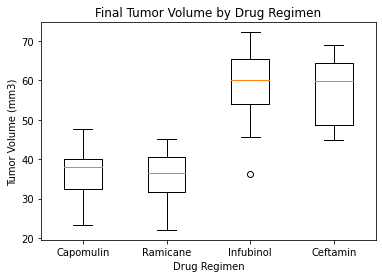

In [101]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots()
ax.set_title('Final Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumorvol_by_drug_df)
plt.xticks([1,2,3,4], treatments)
plt.show()

## Line and Scatter Plots

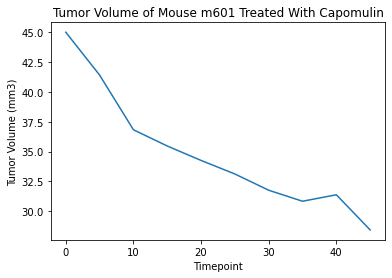

In [102]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# PICK 1 MOUSE - DO A .LOC ON IN TO FIND IT AND PLOT IT

line_df = clean_df.loc[clean_df['Mouse ID'] == 'm601',:]

x_axis = line_df['Timepoint']
y_axis = line_df['Tumor Volume (mm3)']

plt.title('Tumor Volume of Mouse m601 Treated With Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis, y_axis)

plt.show()


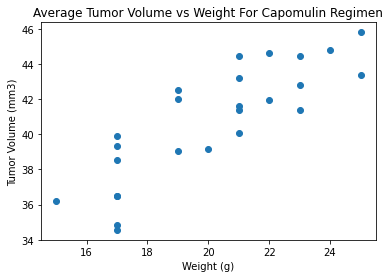

In [103]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# .LOC TO ISOLATE THE CAP DRUG, THEN GROUPBY ON THE MOUSE ID WITH .MEAN THEN SCATTER PLOT IT

cap_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin',:]
scatter_df = cap_df.groupby(['Mouse ID']).mean()
#scatter_df

x_axis = scatter_df['Weight (g)']
data = scatter_df['Tumor Volume (mm3)']

plt.title('Average Tumor Volume vs Weight For Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, data,)


## Correlation and Regression

In [115]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# USE SCATTER PLOT INFO


# Add the linear regression equation and line to plot
model = st.linregress(x_axis, data)
model
print(f"The correlation between mouse weight and average tumor volume is {rvalue}")

The correlation between mouse weight and average tumor volume is 0.8419363424694721


The r-squared is: 0.7088568047708723


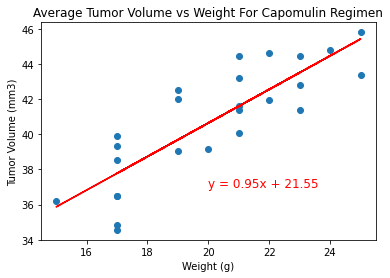

In [121]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data)
plt.plot(x_axis,regress_values,"r-")

plt.annotate(line_eq,(20,37),fontsize=12,color="red")

plt.title('Average Tumor Volume vs Weight For Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

print(f"The r-squared is: {rvalue**2}")
plt.show()